# Brandon Mack

## Revised Research question/interests

**What is the relationship between a players weapon preferences, their accuracy with said weapons and their overall performance in terms of kills, wins and their rating in competitive play. How will these relationships differ across the ranks and as players get to a higher rank will there be a specific gun that players use to achieve this**

To do this I will cross reference a players favourite weapon with their accuracy and then from there, I will compare those stats against the overall stats(kills, wins, rating). I believe that the relationship between rank and gun choice directly affects the overall stats of a player as someone with a sniper may have a higher accuracy percentage but less kills and vice versa. 

## Research question/interests

**Do players who have a higher headshot percentage tend to get more kills and have a higher rank? Does the number of headshots a player accumulates correlate directly to their rank and the amount of wins they achieve.**


I will collect this data based directly off of the headshot percentage per player per rank, this will allow me to see a direct comparison between the high level players and low level players. I will also be comparing each individual players body shot to head shot ratio to mathematically determine if headshots lead to a higher skill level.

In [ ]:
import pandas as pd
df = pd.read_csv('../data/raw/val_stats.csv', low_memory = False)
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


## Exploratory Data Analysis

In [111]:
rating_sorted = df['rating'].sort_values(ascending=True)
kills_sorted = df['kills'].sort_values(ascending=True)
wins_sorted = df['wins'].sort_values(ascending=True)
hspc_sorted = df['headshot_percent'].sort_values(ascending=True)

combined_sorted = pd.concat([rating_sorted, kills_sorted, wins_sorted, hspc_sorted], axis=1)
combined_sorted.to_csv('kills_headshot_rating_wins_BM.csv', index=False)

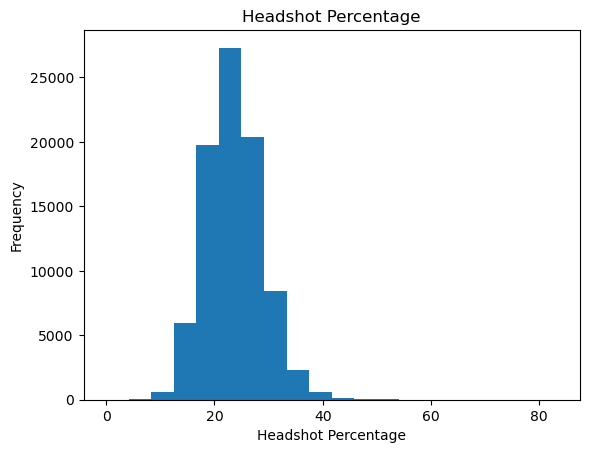

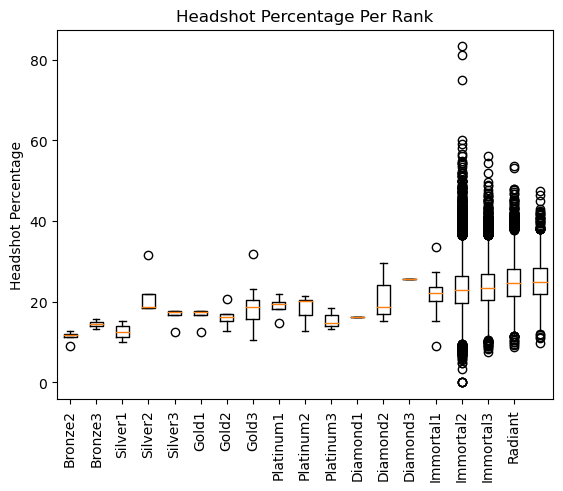

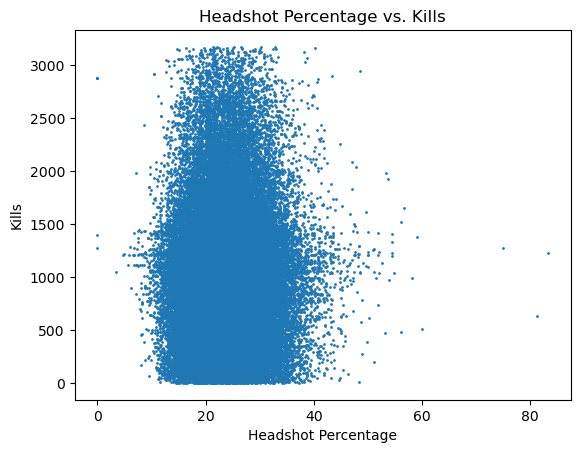

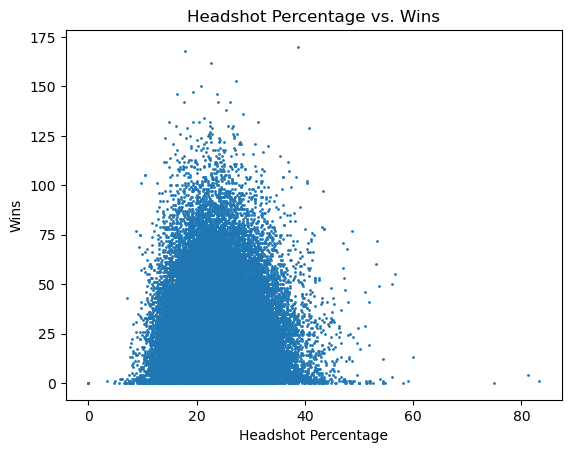

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/val_stats.csv", low_memory = False)

# Histogram of headshot percentage
plt.hist(df['headshot_percent'], bins = 20)
plt.title('Headshot Percentage')
plt.xlabel('Headshot Percentage')
plt.ylabel('Frequency')
plt.show()

# Box plot showing headshot percentage per rank
plt.boxplot([df['headshot_percent'][df['rating'] == 'Bronze 2'],
             df['headshot_percent'][df['rating'] == 'Bronze 3'],
             df['headshot_percent'][df['rating'] == 'Silver 1'],
             df['headshot_percent'][df['rating'] == 'Silver 2'],
             df['headshot_percent'][df['rating'] == 'Silver 3'],
             df['headshot_percent'][df['rating'] == 'Silver 3'],
             df['headshot_percent'][df['rating'] == 'Gold 1'],
             df['headshot_percent'][df['rating'] == 'Gold 2'],
             df['headshot_percent'][df['rating'] == 'Gold 3'],
             df['headshot_percent'][df['rating'] == 'Platinum 1'],
             df['headshot_percent'][df['rating'] == 'Platinum 2'],
             df['headshot_percent'][df['rating'] == 'Platinum 3'],
             df['headshot_percent'][df['rating'] == 'Diamond 1'],
             df['headshot_percent'][df['rating'] == 'Diamond 2'],
             df['headshot_percent'][df['rating'] == 'Diamond 3'],
             df['headshot_percent'][df['rating'] == 'Immortal 1'],
             df['headshot_percent'][df['rating'] == 'Immortal 2'],
             df['headshot_percent'][df['rating'] == 'Immortal 3'],
             df['headshot_percent'][df['rating'] == 'Radiant']])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['Bronze2', 'Bronze3', 'Silver1', 'Silver2', 'Silver3', 'Gold1', 'Gold2', 'Gold3', 'Platinum1', 'Platinum2', 'Platinum3', 'Diamond1', 'Diamond2', 'Diamond3', 'Immortal1', 'Immortal2', 'Immortal3', 'Radiant'], rotation=90)
plt.title('Headshot Percentage Per Rank')
plt.ylabel('Headshot Percentage')
plt.show()

# Scatter plot of headshot percentage vs. kills
plt.scatter(df['headshot_percent'], df['kills'], s = 1)
plt.xlabel('Headshot Percentage')
plt.ylabel('Kills')
plt.yscale('linear')
plt.title('Headshot Percentage vs. Kills')
plt.show()

# Scatter plot of headshot percentage vs. wins
plt.scatter(df['headshot_percent'], df['wins'], s = 1)
plt.xlabel('Headshot Percentage')
plt.ylabel('Wins')
plt.title('Headshot Percentage vs. Wins')
plt.show()